In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 12s 3us/step


In [3]:
#print the shape of daTA 

In [4]:
X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

In [7]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [8]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
## Show image

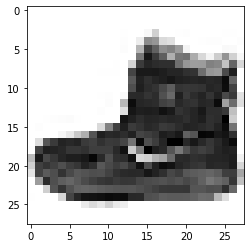

In [10]:
plt.imshow(X_train[0], cmap='Greys')
 

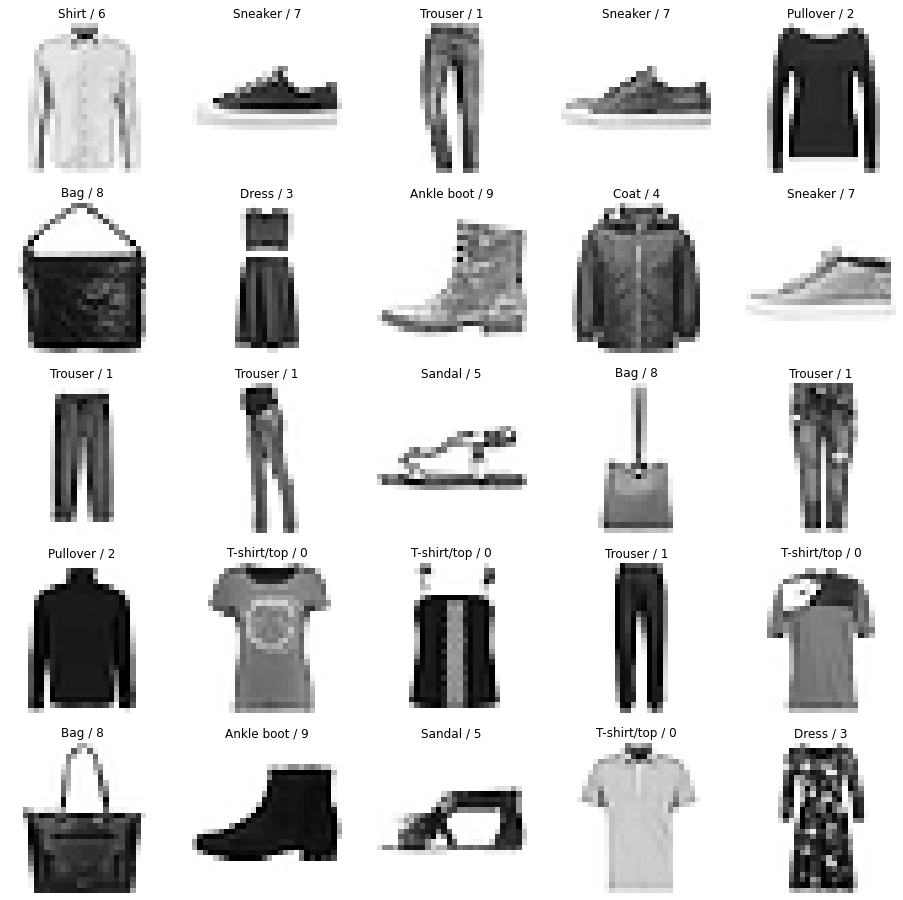

In [11]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train.ndim

3

In [14]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
 

In [15]:
X_train.ndim

4

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
from sklearn.model_selection import train_test_split 

In [18]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [19]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape


((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

Build First Convolutional Neural Network

In [20]:
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [21]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [22]:
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))


Epoch 1/10
94/94 [==============================] - 10s 99ms/step - loss: 0.6409 - accuracy: 0.7790 - val_loss: 0.4309 - val_accuracy: 0.8480
Epoch 2/10
94/94 [==============================] - 9s 95ms/step - loss: 0.3874 - accuracy: 0.8638 - val_loss: 0.3665 - val_accuracy: 0.8764
Epoch 3/10
94/94 [==============================] - 9s 96ms/step - loss: 0.3323 - accuracy: 0.8837 - val_loss: 0.3368 - val_accuracy: 0.8829
Epoch 4/10
94/94 [==============================] - 9s 95ms/step - loss: 0.3057 - accuracy: 0.8916 - val_loss: 0.3276 - val_accuracy: 0.8823
Epoch 5/10
94/94 [==============================] - 9s 97ms/step - loss: 0.2843 - accuracy: 0.8995 - val_loss: 0.3059 - val_accuracy: 0.8931
Epoch 6/10
94/94 [==============================] - 9s 95ms/step - loss: 0.2649 - accuracy: 0.9062 - val_loss: 0.2943 - val_accuracy: 0.8971
Epoch 7/10
94/94 [==============================] - 10s 102ms/step - loss: 0.2476 - accuracy: 0.9127 - val_loss: 0.2790 - val_accuracy: 0.9013
Epoch 8/10

Test the Model

In [24]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.23, 0.05, 0.02]], dtype=float32)

In [25]:
 
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [26]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2792 - accuracy: 0.8987


[0.2792345881462097, 0.8986999988555908]

In [27]:
plt.figure(figsize=(16,16))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

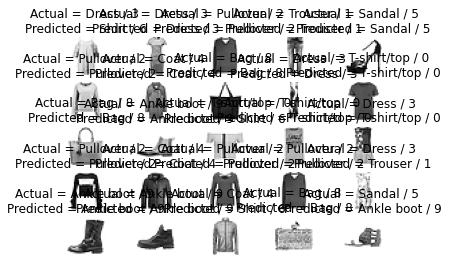

In [28]:
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [29]:
plt.figure(figsize=(16,30))

<Figure size 1152x2160 with 0 Axes>

<Figure size 1152x2160 with 0 Axes>

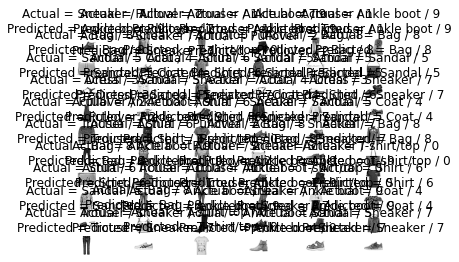

In [30]:
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [31]:
from sklearn.metrics import confusion_matrix
 

In [32]:
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)
 

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.89      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.79      0.89      0.84      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.84      0.84      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.81      0.61      0.69      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



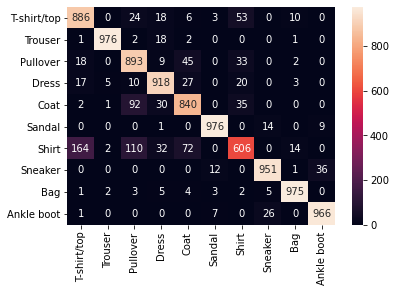

In [33]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [34]:
cnn_model.save('fashion_mnist_cnn_model.h5')

In [35]:
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_cnn_model.h5')

In [36]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [37]:
np.argmax(Y_pred_sample[0])

9

In [38]:
y_test[0]

9

In [39]:
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [40]:
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
94/94 [==============================] - 12s 118ms/step - loss: 1.0438 - accuracy: 0.6095 - val_loss: 0.5916 - val_accuracy: 0.7684
Epoch 2/20
94/94 [==============================] - 11s 118ms/step - loss: 0.5675 - accuracy: 0.7837 - val_loss: 0.4751 - val_accuracy: 0.8219
Epoch 3/20
94/94 [==============================] - 11s 116ms/step - loss: 0.4755 - accuracy: 0.8225 - val_loss: 0.4117 - val_accuracy: 0.8478
Epoch 4/20
94/94 [==============================] - 11s 116ms/step - loss: 0.4182 - accuracy: 0.8473 - val_loss: 0.3632 - val_accuracy: 0.8682
Epoch 5/20
94/94 [==============================] - 12s 130ms/step - loss: 0.3808 - accuracy: 0.8630 - val_loss: 0.3454 - val_accuracy: 0.8731
Epoch 6/20
94/94 [==============================] - 12s 132ms/step - loss: 0.3494 - accuracy: 0.8720 - val_loss: 0.3337 - val_accuracy: 0.8777
Epoch 7/20
94/94 [==============================] - 11s 119ms/step - loss: 0.3340 - accuracy: 0.8766 - val_loss: 0.3152 - val_accuracy: 0.8857

In [42]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

In [46]:
cnn_model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2664 - accuracy: 0.9036


[0.2663508355617523, 0.9035999774932861]